<!-- HTML file automatically generated from DocOnce source (https://github.com/doconce/doconce/)
doconce format html week39.do.txt --no_mako -->
<!-- dom:TITLE: Week 39: Resampling methods and logistic regression -->

# Week 39: Resampling methods and logistic regression
**Morten Hjorth-Jensen**, Department of Physics, University of Oslo

Date: **Week 39**

## Plan for week 39, September 22-26, 2025

**Material for the lecture on Monday September 22.**

1. Resampling techniques, Bootstrap and cross validation and bias-variance tradeoff

2. Logistic regression, our first classification encounter and a stepping stone towards neural networks
<!-- * [Video of lecture](https://youtu.be/ISGpTC28Vmk) -->
<!-- * [Whiteboard notes](https://github.com/CompPhysics/MachineLearning/blob/master/doc/HandWrittenNotes/2024/NotesSeptember23.pdf) -->

## Readings and Videos, resampling methods
1. Raschka et al, pages 175-192

2. Hastie et al Chapter 7, here we recommend 7.1-7.5 and 7.10 (cross-validation) and 7.11 (bootstrap). See <https://link.springer.com/book/10.1007/978-0-387-84858-7>.

3. [Video on bias-variance tradeoff](https://www.youtube.com/watch?v=EuBBz3bI-aA)

4. [Video on Bootstrapping](https://www.youtube.com/watch?v=Xz0x-8-cgaQ)

5. [Video on cross validation](https://www.youtube.com/watch?v=fSytzGwwBVw)

## Readings and Videos, logistic regression
1. Hastie et al 4.1, 4.2 and 4.3 on logistic regression

2. Raschka et al, pages 53-76 on Logistic regression and pages 37-52 on gradient optimization

3. [Video on Logistic regression](https://www.youtube.com/watch?v=C5268D9t9Ak)

4. [Yet another video on logistic regression](https://www.youtube.com/watch?v=yIYKR4sgzI8)

## Lab sessions week 39

**Material for the lab sessions on Tuesday and Wednesday.**

1. Discussions on how to structure your report for the first project

2. Exercise for week 39 on how to write the abstract and the introduction of the report and how to include references. 

3. Work on project 1, in particular resampling methods like cross-validation and bootstrap. **For more discussions of project 1, chapter 5 of Goodfellow et al is a good read, in particular sections 5.1-5.5 and 5.7-5.11**.

4. [Video on how to write scientific reports recorded during one of the lab sessions](https://youtu.be/tVW1ZDmZnwM)

5. A general guideline can be found at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Projects/EvaluationGrading/EvaluationForm.md>.

## Lecture material

## Resampling methods
Resampling methods are an indispensable tool in modern
statistics. They involve repeatedly drawing samples from a training
set and refitting a model of interest on each sample in order to
obtain additional information about the fitted model. For example, in
order to estimate the variability of a linear regression fit, we can
repeatedly draw different samples from the training data, fit a linear
regression to each new sample, and then examine the extent to which
the resulting fits differ. Such an approach may allow us to obtain
information that would not be available from fitting the model only
once using the original training sample.

Two resampling methods are often used in Machine Learning analyses,
1. The **bootstrap method**

2. and **Cross-Validation**

In addition there are several other methods such as the Jackknife and the Blocking methods. This week will repeat some of the elements of the bootstrap method and focus more on cross-validation.

## Resampling approaches can be computationally expensive

Resampling approaches can be computationally expensive, because they
involve fitting the same statistical method multiple times using
different subsets of the training data. However, due to recent
advances in computing power, the computational requirements of
resampling methods generally are not prohibitive. In this chapter, we
discuss two of the most commonly used resampling methods,
cross-validation and the bootstrap. Both methods are important tools
in the practical application of many statistical learning
procedures. For example, cross-validation can be used to estimate the
test error associated with a given statistical learning method in
order to evaluate its performance, or to select the appropriate level
of flexibility. The process of evaluating a model’s performance is
known as model assessment, whereas the process of selecting the proper
level of flexibility for a model is known as model selection. The
bootstrap is widely used.

## Why resampling methods ?
**Statistical analysis.**

* Our simulations can be treated as *computer experiments*. This is particularly the case for Monte Carlo methods which are widely used in statistical analyses.

* The results can be analysed with the same statistical tools as we would use when analysing experimental data.

* As in all experiments, we are looking for expectation values and an estimate of how accurate they are, i.e., possible sources for errors.

## Statistical analysis

* As in other experiments, many numerical  experiments have two classes of errors:

  * Statistical errors

  * Systematical errors

* Statistical errors can be estimated using standard tools from statistics

* Systematical errors are method specific and must be treated differently from case to case.

## Resampling methods

With all these analytical equations for both the OLS and Ridge
regression, we will now outline how to assess a given model. This will
lead to a discussion of the so-called bias-variance tradeoff (see
below) and so-called resampling methods.

One of the quantities we have discussed as a way to measure errors is
the mean-squared error (MSE), mainly used for fitting of continuous
functions. Another choice is the absolute error.

In the discussions below we will focus on the MSE and in particular since we will split the data into test and training data,
we discuss the
1. prediction error or simply the **test error** $\mathrm{Err_{Test}}$, where we have a fixed training set and the test error is the MSE arising from the data reserved for testing. We discuss also the 

2. training error $\mathrm{Err_{Train}}$, which is the average loss over the training data.

As our model becomes more and more complex, more of the training data tends to  used. The training may thence adapt to more complicated structures in the data. This may lead to a decrease in the bias (see below for code example) and a slight increase of the variance for the test error.
For a certain level of complexity the test error will reach minimum, before starting to increase again. The
training error reaches a saturation.

## Resampling methods: Bootstrap
Bootstrapping is a [non-parametric approach](https://en.wikipedia.org/wiki/Nonparametric_statistics) to statistical inference
that substitutes computation for more traditional distributional
assumptions and asymptotic results. Bootstrapping offers a number of
advantages: 
1. The bootstrap is quite general, although there are some cases in which it fails.  

2. Because it does not require distributional assumptions (such as normally distributed errors), the bootstrap can provide more accurate inferences when the data are not well behaved or when the sample size is small.  

3. It is possible to apply the bootstrap to statistics with sampling distributions that are difficult to derive, even asymptotically. 

4. It is relatively simple to apply the bootstrap to complex data-collection plans (such as stratified and clustered samples).

The textbook by [Davison on the Bootstrap Methods and their Applications](https://www.cambridge.org/core/books/bootstrap-methods-and-their-application/ED2FD043579F27952363566DC09CBD6A) provides many more insights and proofs. In this course we will take a more practical approach and use the results and theorems provided in the literature. For those interested in reading more about the bootstrap methods, we recommend the above text and the one by [Efron and Tibshirani](https://www.routledge.com/An-Introduction-to-the-Bootstrap/Efron-Tibshirani/p/book/9780412042317).

## The bias-variance tradeoff

We will discuss the bias-variance tradeoff in the context of
continuous predictions such as regression. However, many of the
intuitions and ideas discussed here also carry over to classification
tasks. Consider a dataset $\mathcal{D}$ consisting of the data
$\mathbf{X}_\mathcal{D}=\{(y_j, \boldsymbol{x}_j), j=0\ldots n-1\}$. 

Let us assume that the true data is generated from a noisy model

$$
\boldsymbol{y}=f(\boldsymbol{x}) + \boldsymbol{\epsilon}
$$

where $\epsilon$ is normally distributed with mean zero and standard deviation $\sigma^2$.

In our derivation of the ordinary least squares method we defined then
an approximation to the function $f$ in terms of the parameters
$\boldsymbol{\theta}$ and the design matrix $\boldsymbol{X}$ which embody our model,
that is $\boldsymbol{\tilde{y}}=\boldsymbol{X}\boldsymbol{\theta}$. 

Thereafter we found the parameters $\boldsymbol{\theta}$ by optimizing the means squared error via the so-called cost function

$$
C(\boldsymbol{X},\boldsymbol{\theta}) =\frac{1}{n}\sum_{i=0}^{n-1}(y_i-\tilde{y}_i)^2=\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right].
$$

We can rewrite this as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\frac{1}{n}\sum_i(f_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\frac{1}{n}\sum_i(\tilde{y}_i-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2+\sigma^2.
$$

The three terms represent the square of the bias of the learning
method, which can be thought of as the error caused by the simplifying
assumptions built into the method. The second term represents the
variance of the chosen model and finally the last terms is variance of
the error $\boldsymbol{\epsilon}$.

To derive this equation, we need to recall that the variance of $\boldsymbol{y}$ and $\boldsymbol{\epsilon}$ are both equal to $\sigma^2$. The mean value of $\boldsymbol{\epsilon}$ is by definition equal to zero. Furthermore, the function $f$ is not a stochastics variable, idem for $\boldsymbol{\tilde{y}}$.
We use a more compact notation in terms of the expectation value

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}})^2\right],
$$

and adding and subtracting $\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]$ we get

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{f}+\boldsymbol{\epsilon}-\boldsymbol{\tilde{y}}+\mathbb{E}\left[\boldsymbol{\tilde{y}}\right]-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right],
$$

which, using the abovementioned expectation values can be rewritten as

$$
\mathbb{E}\left[(\boldsymbol{y}-\boldsymbol{\tilde{y}})^2\right]=\mathbb{E}\left[(\boldsymbol{y}-\mathbb{E}\left[\boldsymbol{\tilde{y}}\right])^2\right]+\mathrm{Var}\left[\boldsymbol{\tilde{y}}\right]+\sigma^2,
$$

that is the rewriting in terms of the so-called bias, the variance of the model $\boldsymbol{\tilde{y}}$ and the variance of $\boldsymbol{\epsilon}$.

**Note that in order to derive these equations we have assumed we can replace the unknown function $\boldsymbol{f}$ with the target/output data $\boldsymbol{y}$.**

## A way to Read the Bias-Variance Tradeoff

<!-- dom:FIGURE: [figures/BiasVariance.png, width=600 frac=0.9] -->
<!-- begin figure -->

<img src="figures/BiasVariance.png" width="600"><p style="font-size: 0.9em"><i>Figure 1: </i></p>
<!-- end figure -->

## Understanding what happens

Polynomial degree: 0
Error: 0.32149601703519115
Bias^2: 0.3123314713548606
Var: 0.009164545680330616
0.32149601703519115 >= 0.3123314713548606 + 0.009164545680330616 = 0.3214960170351912
Polynomial degree: 1
Error: 0.08426840630693412
Bias^2: 0.0796891867672603
Var: 0.004579219539673834
0.08426840630693412 >= 0.0796891867672603 + 0.004579219539673834 = 0.08426840630693413
Polynomial degree: 2
Error: 0.10398646080125037
Bias^2: 0.10077114273548984
Var: 0.0032153180657605116
0.10398646080125037 >= 0.10077114273548984 + 0.0032153180657605116 = 0.10398646080125036
Polynomial degree: 3
Error: 0.06547790180152352
Bias^2: 0.062082386342319454
Var: 0.0033955154592040923
0.06547790180152352 >= 0.062082386342319454 + 0.0033955154592040923 = 0.06547790180152355
Polynomial degree: 4
Error: 0.06844519414009445
Bias^2: 0.06453579006728322
Var: 0.003909404072811221
0.06844519414009445 >= 0.06453579006728322 + 0.003909404072811221 = 0.06844519414009444
Polynomial degree: 5
Error: 0.05227921801205679
B

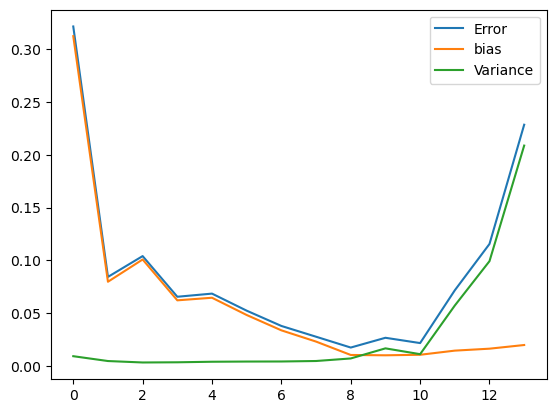

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(2018)

n = 40
n_boostraps = 100
maxdegree = 14


# Make data set.
x = np.linspace(-3, 3, n).reshape(-1, 1)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2)+ np.random.normal(0, 0.1, x.shape)
error = np.zeros(maxdegree)
bias = np.zeros(maxdegree)
variance = np.zeros(maxdegree)
polydegree = np.zeros(maxdegree)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

for degree in range(maxdegree):
    model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for i in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)
        y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

    polydegree[degree] = degree
    error[degree] = np.mean( np.mean((y_test - y_pred)**2, axis=1, keepdims=True) )
    bias[degree] = np.mean( (y_test - np.mean(y_pred, axis=1, keepdims=True))**2 )
    variance[degree] = np.mean( np.var(y_pred, axis=1, keepdims=True) )
    print('Polynomial degree:', degree)
    print('Error:', error[degree])
    print('Bias^2:', bias[degree])
    print('Var:', variance[degree])
    print('{} >= {} + {} = {}'.format(error[degree], bias[degree], variance[degree], bias[degree]+variance[degree]))

plt.plot(polydegree, error, label='Error')
plt.plot(polydegree, bias, label='bias')
plt.plot(polydegree, variance, label='Variance')
plt.legend()
plt.show()

## Summing up

The bias-variance tradeoff summarizes the fundamental tension in
machine learning, particularly supervised learning, between the
complexity of a model and the amount of training data needed to train
it.  Since data is often limited, in practice it is often useful to
use a less-complex model with higher bias, that is  a model whose asymptotic
performance is worse than another model because it is easier to
train and less sensitive to sampling noise arising from having a
finite-sized training dataset (smaller variance). 

The above equations tell us that in
order to minimize the expected test error, we need to select a
statistical learning method that simultaneously achieves low variance
and low bias. Note that variance is inherently a nonnegative quantity,
and squared bias is also nonnegative. Hence, we see that the expected
test MSE can never lie below $Var(\epsilon)$, the irreducible error.

What do we mean by the variance and bias of a statistical learning
method? The variance refers to the amount by which our model would change if we
estimated it using a different training data set. Since the training
data are used to fit the statistical learning method, different
training data sets  will result in a different estimate. But ideally the
estimate for our model should not vary too much between training
sets. However, if a method has high variance  then small changes in
the training data can result in large changes in the model. In general, more
flexible statistical methods have higher variance.

You may also find this recent [article](https://www.pnas.org/content/116/32/15849) of interest.

## Another Example from Scikit-Learn's Repository

This example demonstrates the problems of underfitting and overfitting and
how we can use linear regression with polynomial features to approximate
nonlinear functions. The plot shows the function that we want to approximate,
which is a part of the cosine function. In addition, the samples from the
real function and the approximations of different models are displayed. The
models have polynomial features of different degrees. We can see that a
linear function (polynomial with degree 1) is not sufficient to fit the
training samples. This is called **underfitting**. A polynomial of degree 4
approximates the true function almost perfectly. However, for higher degrees
the model will **overfit** the training data, i.e. it learns the noise of the
training data.
We evaluate quantitatively overfitting and underfitting by using
cross-validation. We calculate the mean squared error (MSE) on the validation
set, the higher, the less likely the model generalizes correctly from the
training data.

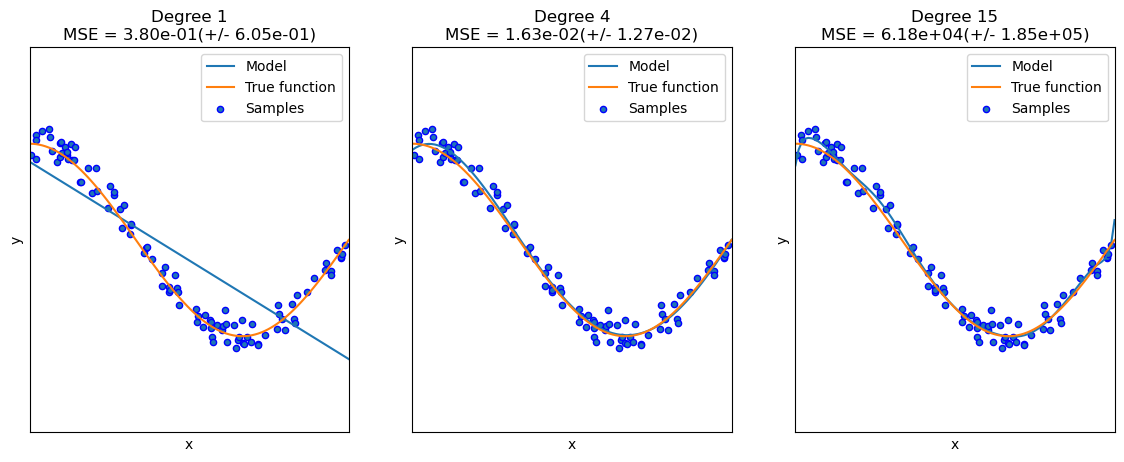

In [3]:


#print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 100
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## Various steps in cross-validation

When the repetitive splitting of the data set is done randomly,
samples may accidently end up in a fast majority of the splits in
either training or test set. Such samples may have an unbalanced
influence on either model building or prediction evaluation. To avoid
this $k$-fold cross-validation structures the data splitting. The
samples are divided into $k$ more or less equally sized exhaustive and
mutually exclusive subsets. In turn (at each split) one of these
subsets plays the role of the test set while the union of the
remaining subsets constitutes the training set. Such a splitting
warrants a balanced representation of each sample in both training and
test set over the splits. Still the division into the $k$ subsets
involves a degree of randomness. This may be fully excluded when
choosing $k=n$. This particular case is referred to as leave-one-out
cross-validation (LOOCV).

## Cross-validation in brief

For the various values of $k$

1. shuffle the dataset randomly.

2. Split the dataset into $k$ groups.

3. For each unique group:

a. Decide which group to use as set for test data

b. Take the remaining groups as a training data set

c. Fit a model on the training set and evaluate it on the test set

d. Retain the evaluation score and discard the model

5. Summarize the model using the sample of model evaluation scores

## Code Example for Cross-validation and $k$-fold Cross-validation

The code here uses Ridge regression with cross-validation (CV)  resampling and $k$-fold CV in order to fit a specific polynomial.

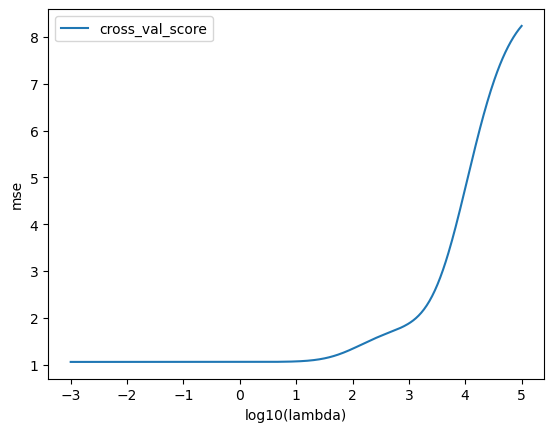

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures

# A seed just to ensure that the random numbers are the same for every run.
# Useful for eventual debugging.
np.random.seed(3155)

# Generate the data.
nsamples = 1000
x = np.random.randn(nsamples)
y = 3*x**2 + np.random.randn(nsamples)

## Cross-validation on Ridge regression using KFold only

# Decide degree on polynomial to fit
poly = PolynomialFeatures(degree = 6)

# Decide which values of lambda to use
nlambdas = 500
lambdas = np.logspace(-3, 5, nlambdas)

# Initialize a KFold instance
k = 5
kfold = KFold(n_splits = k)

# Perform the cross-validation to estimate MSE
scores_KFold = np.zeros((nlambdas, k))

i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)
    j = 0
    for train_inds, test_inds in kfold.split(x):
        xtrain = x[train_inds]
        ytrain = y[train_inds]

        xtest = x[test_inds]
        ytest = y[test_inds]

        Xtrain = poly.fit_transform(xtrain[:, np.newaxis])
        ridge.fit(Xtrain, ytrain[:, np.newaxis])

        Xtest = poly.fit_transform(xtest[:, np.newaxis])
        ypred = ridge.predict(Xtest)

        scores_KFold[i,j] = np.sum((ypred - ytest[:, np.newaxis])**2)/np.size(ypred)

        j += 1
    i += 1


estimated_mse_KFold = np.mean(scores_KFold, axis = 1)

## Cross-validation using cross_val_score from sklearn along with KFold

# kfold is an instance initialized above as:
# kfold = KFold(n_splits = k)

estimated_mse_sklearn = np.zeros(nlambdas)
i = 0
for lmb in lambdas:
    ridge = Ridge(alpha = lmb)

    X = poly.fit_transform(x[:, np.newaxis])
    estimated_mse_folds = cross_val_score(ridge, X, y[:, np.newaxis], scoring='neg_mean_squared_error', cv=kfold)

    # cross_val_score return an array containing the estimated negative mse for every fold.
    # we have to the the mean of every array in order to get an estimate of the mse of the model
    estimated_mse_sklearn[i] = np.mean(-estimated_mse_folds)

    i += 1

## Plot and compare the slightly different ways to perform cross-validation

plt.figure()

plt.plot(np.log10(lambdas), estimated_mse_sklearn, label = 'cross_val_score')
#plt.plot(np.log10(lambdas), estimated_mse_KFold, 'r--', label = 'KFold')

plt.xlabel('log10(lambda)')
plt.ylabel('mse')

plt.legend()

plt.show()

## More examples on bootstrap and cross-validation and errors

Degree of polynomial:   1
Mean squared error on training data: 452833.19458364
Mean squared error on test data: 429773.88954087
Degree of polynomial:   2
Mean squared error on training data: 115870.66701669
Mean squared error on test data: 123112.72459873
Degree of polynomial:   3
Mean squared error on training data: 9004.82954042
Mean squared error on test data: 10869.87549153
Degree of polynomial:   4
Mean squared error on training data: 302.39419906
Mean squared error on test data: 427.32079061
Degree of polynomial:   5
Mean squared error on training data: 3.72578939
Mean squared error on test data: 6.84645891
Degree of polynomial:   6
Mean squared error on training data: 3.57820785
Mean squared error on test data: 10.09754281
Degree of polynomial:   7
Mean squared error on training data: 0.47222838
Mean squared error on test data: 1.71423866
Degree of polynomial:   8
Mean squared error on training data: 0.04911195
Mean squared error on test data: 0.13922321
Degree of polynomial:   

/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_30869/626635268.py:73: RuntimeWarning: divide by zero encountered in log10
  plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_30869/626635268.py:74: RuntimeWarning: divide by zero encountered in log10
  plt.plot(polynomial, np.log10(testerror), label='Test Error')


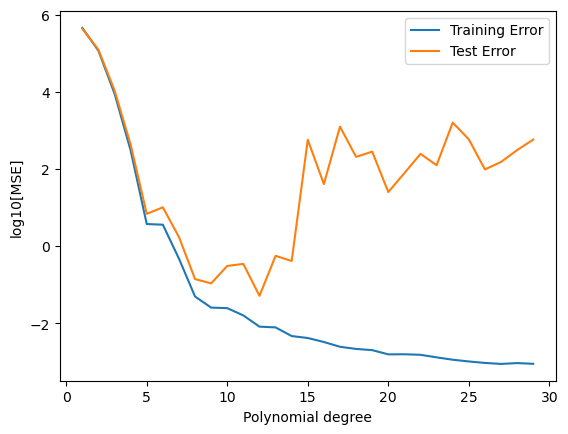

In [7]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
testerror = np.zeros(Maxpolydegree)
trainingerror = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)

trials = 100
for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)

# loop over trials in order to estimate the expectation value of the MSE
    testerror[polydegree] = 0.0
    trainingerror[polydegree] = 0.0
    for samples in range(trials):
        x_train, x_test, y_train, y_test = train_test_split(X, Energies, test_size=0.2)
        model = LinearRegression(fit_intercept=False).fit(x_train, y_train)
        ypred = model.predict(x_train)
        ytilde = model.predict(x_test)
        testerror[polydegree] += mean_squared_error(y_test, ytilde)
        trainingerror[polydegree] += mean_squared_error(y_train, ypred) 

    testerror[polydegree] /= trials
    trainingerror[polydegree] /= trials
    print("Degree of polynomial: %3d"% polynomial[polydegree])
    print("Mean squared error on training data: %.8f" % trainingerror[polydegree])
    print("Mean squared error on test data: %.8f" % testerror[polydegree])

plt.plot(polynomial, np.log10(trainingerror), label='Training Error')
plt.plot(polynomial, np.log10(testerror), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

Note that we kept the intercept column in the fitting here. This means that we need to set the **intercept** in the call to the **Scikit-Learn** function as **False**. Alternatively, we could have set up the design matrix $X$ without the first column of ones.

## The same example but now with cross-validation

In this example we keep the intercept column again but add cross-validation in order to estimate the best possible value of the means squared error.

/var/folders/td/3yk470mj5p931p9dtkk0y6jw0000gn/T/ipykernel_30869/3127697733.py:63: RuntimeWarning: divide by zero encountered in log10
  plt.plot(polynomial, np.log10(estimated_mse_sklearn), label='Test Error')


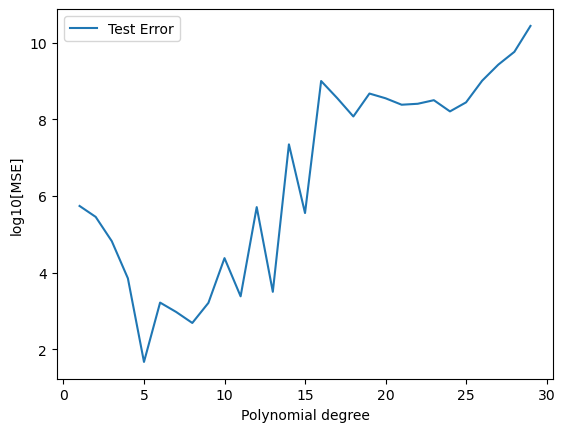

In [11]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("EoS.csv"),'r')

# Read the EoS data as  csv file and organize the data into two arrays with density and energies
EoS = pd.read_csv(infile, names=('Density', 'Energy'))
EoS['Energy'] = pd.to_numeric(EoS['Energy'], errors='coerce')
EoS = EoS.dropna()
Energies = EoS['Energy']
Density = EoS['Density']
#  The design matrix now as function of various polytrops

Maxpolydegree = 30
X = np.zeros((len(Density),Maxpolydegree))
X[:,0] = 1.0
estimated_mse_sklearn = np.zeros(Maxpolydegree)
polynomial = np.zeros(Maxpolydegree)
k =10
kfold = KFold(n_splits = k)

for polydegree in range(1, Maxpolydegree):
    polynomial[polydegree] = polydegree
    for degree in range(polydegree):
        X[:,degree] = Density**(degree/3.0)
        OLS = LinearRegression(fit_intercept=False)
# loop over trials in order to estimate the expectation value of the MSE
    estimated_mse_folds = cross_val_score(OLS, X, Energies, scoring='neg_mean_squared_error', cv=kfold)
#[:, np.newaxis]
    estimated_mse_sklearn[polydegree] = np.mean(-estimated_mse_folds)

plt.plot(polynomial, np.log10(estimated_mse_sklearn), label='Test Error')
plt.xlabel('Polynomial degree')
plt.ylabel('log10[MSE]')
plt.legend()
plt.show()

## Logistic Regression

In linear regression our main interest was centered on learning the
coefficients of a functional fit (say a polynomial) in order to be
able to predict the response of a continuous variable on some unseen
data. The fit to the continuous variable $y_i$ is based on some
independent variables $\boldsymbol{x}_i$. Linear regression resulted in
analytical expressions for standard ordinary Least Squares or Ridge
regression (in terms of matrices to invert) for several quantities,
ranging from the variance and thereby the confidence intervals of the
parameters $\boldsymbol{\theta}$ to the mean squared error. If we can invert
the product of the design matrices, linear regression gives then a
simple recipe for fitting our data.

## Classification problems

Classification problems, however, are concerned with outcomes taking
the form of discrete variables (i.e. categories). We may for example,
on the basis of DNA sequencing for a number of patients, like to find
out which mutations are important for a certain disease; or based on
scans of various patients' brains, figure out if there is a tumor or
not; or given a specific physical system, we'd like to identify its
state, say whether it is an ordered or disordered system (typical
situation in solid state physics); or classify the status of a
patient, whether she/he has a stroke or not and many other similar
situations.

The most common situation we encounter when we apply logistic
regression is that of two possible outcomes, normally denoted as a
binary outcome, true or false, positive or negative, success or
failure etc.

## Optimization and Deep learning

Logistic regression will also serve as our stepping stone towards
neural network algorithms and supervised deep learning. For logistic
learning, the minimization of the cost function leads to a non-linear
equation in the parameters $\boldsymbol{\theta}$. The optimization of the
problem calls therefore for minimization algorithms. This forms the
bottle neck of all machine learning algorithms, namely how to find
reliable minima of a multi-variable function. This leads us to the
family of gradient descent methods. The latter are the working horses
of basically all modern machine learning algorithms.

We note also that many of the topics discussed here on logistic 
regression are also commonly used in modern supervised Deep Learning
models, as we will see later.

## Basics

We consider the case where the outputs/targets, also called the
responses or the outcomes, $y_i$ are discrete and only take values
from $k=0,\dots,K-1$ (i.e. $K$ classes).

The goal is to predict the
output classes from the design matrix $\boldsymbol{X}\in\mathbb{R}^{n\times p}$
made of $n$ samples, each of which carries $p$ features or predictors. The
primary goal is to identify the classes to which new unseen samples
belong.

Let us specialize to the case of two classes only, with outputs
$y_i=0$ and $y_i=1$. Our outcomes could represent the status of a
credit card user that could default or not on her/his credit card
debt. That is

$$
y_i = \begin{bmatrix} 0 & \mathrm{no}\\  1 & \mathrm{yes} \end{bmatrix}.
$$

## Linear classifier

Before moving to the logistic model, let us try to use our linear
regression model to classify these two outcomes. We could for example
fit a linear model to the default case if $y_i > 0.5$ and the no
default case $y_i \leq 0.5$.

We would then have our 
weighted linear combination, namely

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\boldsymbol{y} = \boldsymbol{X}^T\boldsymbol{\theta} +  \boldsymbol{\epsilon},
\label{_auto1} \tag{1}
\end{equation}
$$

where $\boldsymbol{y}$ is a vector representing the possible outcomes, $\boldsymbol{X}$ is our
$n\times p$ design matrix and $\boldsymbol{\theta}$ represents our estimators/predictors.

## Some selected properties

The main problem with our function is that it takes values on the
entire real axis. In the case of logistic regression, however, the
labels $y_i$ are discrete variables. A typical example is the credit
card data discussed below here, where we can set the state of
defaulting the debt to $y_i=1$ and not to $y_i=0$ for one the persons
in the data set (see the full example below).

One simple way to get a discrete output is to have sign
functions that map the output of a linear regressor to values $\{0,1\}$,
$f(s_i)=sign(s_i)=1$ if $s_i\ge 0$ and 0 if otherwise. 
We will encounter this model in our first demonstration of neural networks.

Historically it is called the **perceptron** model in the machine learning
literature. This model is extremely simple. However, in many cases it is more
favorable to use a ``soft" classifier that outputs
the probability of a given category. This leads us to the logistic function.

## Simple example

The following example on data for coronary heart disease (CHD) as function of age may serve as an illustration. In the code here we read and plot whether a person has had CHD (output = 1) or not (output = 0). This ouput  is plotted the person's against age. Clearly, the figure shows that attempting to make a standard linear regression fit may not be very meaningful.

In [6]:
# Common imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import mean_squared_error
from IPython.display import display
from pylab import plt, mpl
mpl.rcParams['font.family'] = 'serif'

# Where to save the figures and data files
PROJECT_ROOT_DIR = "Results"
FIGURE_ID = "Results/FigureFiles"
DATA_ID = "DataFiles/"

if not os.path.exists(PROJECT_ROOT_DIR):
    os.mkdir(PROJECT_ROOT_DIR)

if not os.path.exists(FIGURE_ID):
    os.makedirs(FIGURE_ID)

if not os.path.exists(DATA_ID):
    os.makedirs(DATA_ID)

def image_path(fig_id):
    return os.path.join(FIGURE_ID, fig_id)

def data_path(dat_id):
    return os.path.join(DATA_ID, dat_id)

def save_fig(fig_id):
    plt.savefig(image_path(fig_id) + ".png", format='png')

infile = open(data_path("chddata.csv"),'r')

# Read the chd data as  csv file and organize the data into arrays with age group, age, and chd
chd = pd.read_csv(infile, names=('ID', 'Age', 'Agegroup', 'CHD'))
chd.columns = ['ID', 'Age', 'Agegroup', 'CHD']
output = chd['CHD']
age = chd['Age']
agegroup = chd['Agegroup']
numberID  = chd['ID'] 
display(chd)

plt.scatter(age, output, marker='o')
plt.axis([18,70.0,-0.1, 1.2])
plt.xlabel(r'Age')
plt.ylabel(r'CHD')
plt.title(r'Age distribution and Coronary heart disease')
plt.show()

## Plotting the mean value for each group

What we could attempt however is to plot the mean value for each group.

In [7]:
agegroupmean = np.array([0.1, 0.133, 0.250, 0.333, 0.462, 0.625, 0.765, 0.800])
group = np.array([1, 2, 3, 4, 5, 6, 7, 8])
plt.plot(group, agegroupmean, "r-")
plt.axis([0,9,0, 1.0])
plt.xlabel(r'Age group')
plt.ylabel(r'CHD mean values')
plt.title(r'Mean values for each age group')
plt.show()

We are now trying to find a function $f(y\vert x)$, that is a function which gives us an expected value for the output $y$ with a given input $x$.
In standard linear regression with a linear dependence on $x$, we would write this in terms of our model

$$
f(y_i\vert x_i)=\theta_0+\theta_1 x_i.
$$

This expression implies however that $f(y_i\vert x_i)$ could take any
value from minus infinity to plus infinity. If we however let
$f(y\vert y)$ be represented by the mean value, the above example
shows us that we can constrain the function to take values between
zero and one, that is we have $0 \le f(y_i\vert x_i) \le 1$. Looking
at our last curve we see also that it has an S-shaped form. This leads
us to a very popular model for the function $f$, namely the so-called
Sigmoid function or logistic model. We will consider this function as
representing the probability for finding a value of $y_i$ with a given
$x_i$.

## The logistic function

Another widely studied model, is the so-called 
perceptron model, which is an example of a "hard classification" model. We
will encounter this model when we discuss neural networks as
well. Each datapoint is deterministically assigned to a category (i.e
$y_i=0$ or $y_i=1$). In many cases, and the coronary heart disease data forms one of many such examples, it is favorable to have a "soft"
classifier that outputs the probability of a given category rather
than a single value. For example, given $x_i$, the classifier
outputs the probability of being in a category $k$.  Logistic regression
is the most common example of a so-called soft classifier. In logistic
regression, the probability that a data point $x_i$
belongs to a category $y_i=\{0,1\}$ is given by the so-called logit function (or Sigmoid) which is meant to represent the likelihood for a given event,

$$
p(t) = \frac{1}{1+\mathrm \exp{-t}}=\frac{\exp{t}}{1+\mathrm \exp{t}}.
$$

Note that $1-p(t)= p(-t)$.

## Examples of likelihood functions used in logistic regression and nueral networks

The following code plots the logistic function, the step function and other functions we will encounter from here and on.

In [8]:
"""The sigmoid function (or the logistic curve) is a
function that takes any real number, z, and outputs a number (0,1).
It is useful in neural networks for assigning weights on a relative scale.
The value z is the weighted sum of parameters involved in the learning algorithm."""

import numpy
import matplotlib.pyplot as plt
import math as mt

z = numpy.arange(-5, 5, .1)
sigma_fn = numpy.vectorize(lambda z: 1/(1+numpy.exp(-z)))
sigma = sigma_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, sigma)
ax.set_ylim([-0.1, 1.1])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('sigmoid function')

plt.show()

"""Step Function"""
z = numpy.arange(-5, 5, .02)
step_fn = numpy.vectorize(lambda z: 1.0 if z >= 0.0 else 0.0)
step = step_fn(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, step)
ax.set_ylim([-0.5, 1.5])
ax.set_xlim([-5,5])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('step function')

plt.show()

"""tanh Function"""
z = numpy.arange(-2*mt.pi, 2*mt.pi, 0.1)
t = numpy.tanh(z)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(z, t)
ax.set_ylim([-1.0, 1.0])
ax.set_xlim([-2*mt.pi,2*mt.pi])
ax.grid(True)
ax.set_xlabel('z')
ax.set_title('tanh function')

plt.show()

## Two parameters

We assume now that we have two classes with $y_i$ either $0$ or $1$. Furthermore we assume also that we have only two parameters $\theta$ in our fitting of the Sigmoid function, that is we define probabilities

$$
\begin{align*}
p(y_i=1|x_i,\boldsymbol{\theta}) &= \frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}},\nonumber\\
p(y_i=0|x_i,\boldsymbol{\theta}) &= 1 - p(y_i=1|x_i,\boldsymbol{\theta}),
\end{align*}
$$

where $\boldsymbol{\theta}$ are the weights we wish to extract from data, in our case $\theta_0$ and $\theta_1$. 

Note that we used

$$
p(y_i=0\vert x_i, \boldsymbol{\theta}) = 1-p(y_i=1\vert x_i, \boldsymbol{\theta}).
$$

## Maximum likelihood

In order to define the total likelihood for all possible outcomes from a  
dataset $\mathcal{D}=\{(y_i,x_i)\}$, with the binary labels
$y_i\in\{0,1\}$ and where the data points are drawn independently, we use the so-called [Maximum Likelihood Estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) (MLE) principle. 
We aim thus at maximizing 
the probability of seeing the observed data. We can then approximate the 
likelihood in terms of the product of the individual probabilities of a specific outcome $y_i$, that is

$$
\begin{align*}
P(\mathcal{D}|\boldsymbol{\theta})& = \prod_{i=1}^n \left[p(y_i=1|x_i,\boldsymbol{\theta})\right]^{y_i}\left[1-p(y_i=1|x_i,\boldsymbol{\theta}))\right]^{1-y_i}\nonumber \\
\end{align*}
$$

from which we obtain the log-likelihood and our **cost/loss** function

$$
\mathcal{C}(\boldsymbol{\theta}) = \sum_{i=1}^n \left( y_i\log{p(y_i=1|x_i,\boldsymbol{\theta})} + (1-y_i)\log\left[1-p(y_i=1|x_i,\boldsymbol{\theta}))\right]\right).
$$

## The cost function rewritten

Reordering the logarithms, we can rewrite the **cost/loss** function as

$$
\mathcal{C}(\boldsymbol{\theta}) = \sum_{i=1}^n  \left(y_i(\theta_0+\theta_1x_i) -\log{(1+\exp{(\theta_0+\theta_1x_i)})}\right).
$$

The maximum likelihood estimator is defined as the set of parameters that maximize the log-likelihood where we maximize with respect to $\theta$.
Since the cost (error) function is just the negative log-likelihood, for logistic regression we have that

$$
\mathcal{C}(\boldsymbol{\theta})=-\sum_{i=1}^n  \left(y_i(\theta_0+\theta_1x_i) -\log{(1+\exp{(\theta_0+\theta_1x_i)})}\right).
$$

This equation is known in statistics as the **cross entropy**. Finally, we note that just as in linear regression, 
in practice we often supplement the cross-entropy with additional regularization terms, usually $L_1$ and $L_2$ regularization as we did for Ridge and Lasso regression.

## Minimizing the cross entropy

The cross entropy is a convex function of the weights $\boldsymbol{\theta}$ and,
therefore, any local minimizer is a global minimizer. 

Minimizing this
cost function with respect to the two parameters $\theta_0$ and $\theta_1$ we obtain

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \theta_0} = -\sum_{i=1}^n  \left(y_i -\frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}}\right),
$$

and

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \theta_1} = -\sum_{i=1}^n  \left(y_ix_i -x_i\frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}}\right).
$$

## A more compact expression

Let us now define a vector $\boldsymbol{y}$ with $n$ elements $y_i$, an
$n\times p$ matrix $\boldsymbol{X}$ which contains the $x_i$ values and a
vector $\boldsymbol{p}$ of fitted probabilities $p(y_i\vert x_i,\boldsymbol{\theta})$. We can rewrite in a more compact form the first
derivative of the cost function as

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = -\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{p}\right).
$$

If we in addition define a diagonal matrix $\boldsymbol{W}$ with elements 
$p(y_i\vert x_i,\boldsymbol{\theta})(1-p(y_i\vert x_i,\boldsymbol{\theta})$, we can obtain a compact expression of the second derivative as

$$
\frac{\partial^2 \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}^T} = \boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X}.
$$

## Extending to more predictors

Within a binary classification problem, we can easily expand our model to include multiple predictors. Our ratio between likelihoods is then with $p$ predictors

$$
\log{ \frac{p(\boldsymbol{\theta}\boldsymbol{x})}{1-p(\boldsymbol{\theta}\boldsymbol{x})}} = \theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_px_p.
$$

Here we defined $\boldsymbol{x}=[1,x_1,x_2,\dots,x_p]$ and $\boldsymbol{\theta}=[\theta_0, \theta_1, \dots, \theta_p]$ leading to

$$
p(\boldsymbol{\theta}\boldsymbol{x})=\frac{ \exp{(\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_px_p)}}{1+\exp{(\theta_0+\theta_1x_1+\theta_2x_2+\dots+\theta_px_p)}}.
$$

## Including more classes

Till now we have mainly focused on two classes, the so-called binary
system. Suppose we wish to extend to $K$ classes.  Let us for the sake
of simplicity assume we have only two predictors. We have then following model

$$
\log{\frac{p(C=1\vert x)}{p(K\vert x)}} = \theta_{10}+\theta_{11}x_1,
$$

and

$$
\log{\frac{p(C=2\vert x)}{p(K\vert x)}} = \theta_{20}+\theta_{21}x_1,
$$

and so on till the class $C=K-1$ class

$$
\log{\frac{p(C=K-1\vert x)}{p(K\vert x)}} = \theta_{(K-1)0}+\theta_{(K-1)1}x_1,
$$

and the model is specified in term of $K-1$ so-called log-odds or
**logit** transformations.

## More classes

In our discussion of neural networks we will encounter the above again
in terms of a slightly modified function, the so-called **Softmax** function.

The softmax function is used in various multiclass classification
methods, such as multinomial logistic regression (also known as
softmax regression), multiclass linear discriminant analysis, naive
Bayes classifiers, and artificial neural networks.  Specifically, in
multinomial logistic regression and linear discriminant analysis, the
input to the function is the result of $K$ distinct linear functions,
and the predicted probability for the $k$-th class given a sample
vector $\boldsymbol{x}$ and a weighting vector $\boldsymbol{\theta}$ is (with two
predictors):

$$
p(C=k\vert \mathbf {x} )=\frac{\exp{(\theta_{k0}+\theta_{k1}x_1)}}{1+\sum_{l=1}^{K-1}\exp{(\theta_{l0}+\theta_{l1}x_1)}}.
$$

It is easy to extend to more predictors. The final class is

$$
p(C=K\vert \mathbf {x} )=\frac{1}{1+\sum_{l=1}^{K-1}\exp{(\theta_{l0}+\theta_{l1}x_1)}},
$$

and they sum to one. Our earlier discussions were all specialized to
the case with two classes only. It is easy to see from the above that
what we derived earlier is compatible with these equations.

To find the optimal parameters we would typically use a gradient
descent method.  Newton's method and gradient descent methods are
discussed in the material on [optimization
methods](https://compphysics.github.io/MachineLearning/doc/pub/Splines/html/Splines-bs.html).

## Optimization, the central part of any Machine Learning algortithm

Almost every problem in machine learning and data science starts with
a dataset $X$, a model $g(\theta)$, which is a function of the
parameters $\theta$ and a cost function $C(X, g(\theta))$ that allows
us to judge how well the model $g(\theta)$ explains the observations
$X$. The model is fit by finding the values of $\theta$ that minimize
the cost function. Ideally we would be able to solve for $\theta$
analytically, however this is not possible in general and we must use
some approximative/numerical method to compute the minimum.

## Revisiting our Logistic Regression case

In our discussion on Logistic Regression we studied the 
case of
two classes, with $y_i$ either
$0$ or $1$. Furthermore we assumed also that we have only two
parameters $\theta$ in our fitting, that is we
defined probabilities

$$
\begin{align*}
p(y_i=1|x_i,\boldsymbol{\theta}) &= \frac{\exp{(\theta_0+\theta_1x_i)}}{1+\exp{(\theta_0+\theta_1x_i)}},\nonumber\\
p(y_i=0|x_i,\boldsymbol{\theta}) &= 1 - p(y_i=1|x_i,\boldsymbol{\theta}),
\end{align*}
$$

where $\boldsymbol{\theta}$ are the weights we wish to extract from data, in our case $\theta_0$ and $\theta_1$.

## The equations to solve

Our compact equations used a definition of a vector $\boldsymbol{y}$ with $n$
elements $y_i$, an $n\times p$ matrix $\boldsymbol{X}$ which contains the
$x_i$ values and a vector $\boldsymbol{p}$ of fitted probabilities
$p(y_i\vert x_i,\boldsymbol{\theta})$. We rewrote in a more compact form
the first derivative of the cost function as

$$
\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}} = -\boldsymbol{X}^T\left(\boldsymbol{y}-\boldsymbol{p}\right).
$$

If we in addition define a diagonal matrix $\boldsymbol{W}$ with elements 
$p(y_i\vert x_i,\boldsymbol{\theta})(1-p(y_i\vert x_i,\boldsymbol{\theta})$, we can obtain a compact expression of the second derivative as

$$
\frac{\partial^2 \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}^T} = \boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X}.
$$

This defines what is called  the Hessian matrix.

## Solving using Newton-Raphson's method

If we can set up these equations, Newton-Raphson's iterative method is normally the method of choice. It requires however that we can compute in an efficient way the  matrices that define the first and second derivatives. 

Our iterative scheme is then given by

$$
\boldsymbol{\theta}^{\mathrm{new}} = \boldsymbol{\theta}^{\mathrm{old}}-\left(\frac{\partial^2 \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}\partial \boldsymbol{\theta}^T}\right)^{-1}_{\boldsymbol{\theta}^{\mathrm{old}}}\times \left(\frac{\partial \mathcal{C}(\boldsymbol{\theta})}{\partial \boldsymbol{\theta}}\right)_{\boldsymbol{\theta}^{\mathrm{old}}},
$$

or in matrix form as

$$
\boldsymbol{\theta}^{\mathrm{new}} = \boldsymbol{\theta}^{\mathrm{old}}-\left(\boldsymbol{X}^T\boldsymbol{W}\boldsymbol{X} \right)^{-1}\times \left(-\boldsymbol{X}^T(\boldsymbol{y}-\boldsymbol{p}) \right)_{\boldsymbol{\theta}^{\mathrm{old}}}.
$$

The right-hand side is computed with the old values of $\theta$. 

If we can compute these matrices, in particular the Hessian, the above is often the easiest method to implement.

## Example code for Logistic Regression

Here we make a class for Logistic regression. The code uses a simple data set and includes both a binary case and a multiclass case.

In [9]:
import numpy as np

class LogisticRegression:
    """
    Logistic Regression for binary and multiclass classification.
    """
    def __init__(self, lr=0.01, epochs=1000, fit_intercept=True, verbose=False):
        self.lr = lr                  # Learning rate for gradient descent
        self.epochs = epochs          # Number of iterations
        self.fit_intercept = fit_intercept  # Whether to add intercept (bias)
        self.verbose = verbose        # Print loss during training if True
        self.weights = None
        self.multi_class = False      # Will be determined at fit time

    def _add_intercept(self, X):
        """Add intercept term (column of ones) to feature matrix."""
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)

    def _sigmoid(self, z):
        """Sigmoid function for binary logistic."""
        return 1 / (1 + np.exp(-z))

    def _softmax(self, Z):
        """Softmax function for multiclass logistic."""
        exp_Z = np.exp(Z - np.max(Z, axis=1, keepdims=True))
        return exp_Z / np.sum(exp_Z, axis=1, keepdims=True)

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.
        Supports binary (sigmoid) and multiclass (softmax) based on y.
        """
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        # Add intercept if needed
        if self.fit_intercept:
            X = self._add_intercept(X)
            n_features += 1

        # Determine classes and mode (binary vs multiclass)
        unique_classes = np.unique(y)
        if len(unique_classes) > 2:
            self.multi_class = True
        else:
            self.multi_class = False

        # ----- Multiclass case -----
        if self.multi_class:
            n_classes = len(unique_classes)
            # Map original labels to 0...n_classes-1
            class_to_index = {c: idx for idx, c in enumerate(unique_classes)}
            y_indices = np.array([class_to_index[c] for c in y])
            # Initialize weight matrix (features x classes)
            self.weights = np.zeros((n_features, n_classes))

            # One-hot encode y
            Y_onehot = np.zeros((n_samples, n_classes))
            Y_onehot[np.arange(n_samples), y_indices] = 1

            # Gradient descent
            for epoch in range(self.epochs):
                scores = X.dot(self.weights)          # Linear scores (n_samples x n_classes)
                probs = self._softmax(scores)        # Probabilities (n_samples x n_classes)
                # Compute gradient (features x classes)
                gradient = (1 / n_samples) * X.T.dot(probs - Y_onehot)
                # Update weights
                self.weights -= self.lr * gradient

                if self.verbose and epoch % 100 == 0:
                    # Compute current loss (categorical cross-entropy)
                    loss = -np.sum(Y_onehot * np.log(probs + 1e-15)) / n_samples
                    print(f"[Epoch {epoch}] Multiclass loss: {loss:.4f}")

        # ----- Binary case -----
        else:
            # Convert y to 0/1 if not already
            if not np.array_equal(unique_classes, [0, 1]):
                # Map the two classes to 0 and 1
                class0, class1 = unique_classes
                y_binary = np.where(y == class1, 1, 0)
            else:
                y_binary = y.copy().astype(int)

            # Initialize weights vector (features,)
            self.weights = np.zeros(n_features)

            # Gradient descent
            for epoch in range(self.epochs):
                linear_model = X.dot(self.weights)     # (n_samples,)
                probs = self._sigmoid(linear_model)   # (n_samples,)
                # Gradient for binary cross-entropy
                gradient = (1 / n_samples) * X.T.dot(probs - y_binary)
                self.weights -= self.lr * gradient

                if self.verbose and epoch % 100 == 0:
                    # Compute binary cross-entropy loss
                    loss = -np.mean(
                        y_binary * np.log(probs + 1e-15) + 
                        (1 - y_binary) * np.log(1 - probs + 1e-15)
                    )
                    print(f"[Epoch {epoch}] Binary loss: {loss:.4f}")

    def predict_prob(self, X):
        """
        Compute probability estimates. Returns a 1D array for binary or
        a 2D array (n_samples x n_classes) for multiclass.
        """
        X = np.array(X)
        # Add intercept if the model used it
        if self.fit_intercept:
            X = self._add_intercept(X)
        scores = X.dot(self.weights)
        if self.multi_class:
            return self._softmax(scores)
        else:
            return self._sigmoid(scores)

    def predict(self, X):
        """
        Predict class labels for samples in X.
        Returns integer class labels (0,1 for binary, or 0...C-1 for multiclass).
        """
        probs = self.predict_prob(X)
        if self.multi_class:
            # Choose class with highest probability
            return np.argmax(probs, axis=1)
        else:
            # Threshold at 0.5 for binary
            return (probs >= 0.5).astype(int)

The class implements the sigmoid and softmax internally. During fit(),
we check the number of classes: if more than 2, we set
self.multi_class=True and perform multinomial logistic regression. We
one-hot encode the target vector and update a weight matrix with
softmax probabilities. Otherwise, we do standard binary logistic
regression, converting labels to 0/1 if needed and updating a weight
vector. In both cases we use batch gradient descent on the
cross-entropy loss (we add a small epsilon 1e-15 to logs for numerical
stability). Progress (loss) can be printed if verbose=True.

In [10]:
# Evaluation Metrics
#We define helper functions for accuracy and cross-entropy loss. Accuracy is the fraction of correct predictions . For loss, we compute the appropriate cross-entropy:

def accuracy_score(y_true, y_pred):
    """Accuracy = (# correct predictions) / (total samples)."""
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(y_true == y_pred)

def binary_cross_entropy(y_true, y_prob):
    """
    Binary cross-entropy loss.
    y_true: true binary labels (0 or 1), y_prob: predicted probabilities for class 1.
    """
    y_true = np.array(y_true)
    y_prob = np.clip(np.array(y_prob), 1e-15, 1-1e-15)
    return -np.mean(y_true * np.log(y_prob) + (1 - y_true) * np.log(1 - y_prob))

def categorical_cross_entropy(y_true, y_prob):
    """
    Categorical cross-entropy loss for multiclass.
    y_true: true labels (0...C-1), y_prob: array of predicted probabilities (n_samples x C).
    """
    y_true = np.array(y_true, dtype=int)
    y_prob = np.clip(np.array(y_prob), 1e-15, 1-1e-15)
    # One-hot encode true labels
    n_samples, n_classes = y_prob.shape
    one_hot = np.zeros_like(y_prob)
    one_hot[np.arange(n_samples), y_true] = 1
    # Compute cross-entropy
    loss_vec = -np.sum(one_hot * np.log(y_prob), axis=1)
    return np.mean(loss_vec)

### Synthetic data generation

Binary classification data: Create two Gaussian clusters in 2D. For example, class 0 around mean [-2,-2] and class 1 around [2,2].
Multiclass data: Create several Gaussian clusters (one per class) spread out in feature space.

In [11]:
import numpy as np

def generate_binary_data(n_samples=100, n_features=2, random_state=None):
    """
    Generate synthetic binary classification data.
    Returns (X, y) where X is (n_samples x n_features), y in {0,1}.
    """
    rng = np.random.RandomState(random_state)
    # Half samples for class 0, half for class 1
    n0 = n_samples // 2
    n1 = n_samples - n0
    # Class 0 around mean -2, class 1 around +2
    mean0 = -2 * np.ones(n_features)
    mean1 =  2 * np.ones(n_features)
    X0 = rng.randn(n0, n_features) + mean0
    X1 = rng.randn(n1, n_features) + mean1
    X = np.vstack((X0, X1))
    y = np.array([0]*n0 + [1]*n1)
    return X, y

def generate_multiclass_data(n_samples=150, n_features=2, n_classes=3, random_state=None):
    """
    Generate synthetic multiclass data with n_classes Gaussian clusters.
    """
    rng = np.random.RandomState(random_state)
    X = []
    y = []
    samples_per_class = n_samples // n_classes
    for cls in range(n_classes):
        # Random cluster center for each class
        center = rng.uniform(-5, 5, size=n_features)
        Xi = rng.randn(samples_per_class, n_features) + center
        yi = [cls] * samples_per_class
        X.append(Xi)
        y.extend(yi)
    X = np.vstack(X)
    y = np.array(y)
    return X, y


# Generate and test on binary data
X_bin, y_bin = generate_binary_data(n_samples=200, n_features=2, random_state=42)
model_bin = LogisticRegression(lr=0.1, epochs=1000)
model_bin.fit(X_bin, y_bin)
y_prob_bin = model_bin.predict_prob(X_bin)      # probabilities for class 1
y_pred_bin = model_bin.predict(X_bin)           # predicted classes 0 or 1

acc_bin = accuracy_score(y_bin, y_pred_bin)
loss_bin = binary_cross_entropy(y_bin, y_prob_bin)
print(f"Binary Classification - Accuracy: {acc_bin:.2f}, Cross-Entropy Loss: {loss_bin:.2f}")
#For multiclass:
# Generate and test on multiclass data
X_multi, y_multi = generate_multiclass_data(n_samples=300, n_features=2, n_classes=3, random_state=1)
model_multi = LogisticRegression(lr=0.1, epochs=1000)
model_multi.fit(X_multi, y_multi)
y_prob_multi = model_multi.predict_prob(X_multi)     # (n_samples x 3) probabilities
y_pred_multi = model_multi.predict(X_multi)          # predicted labels 0,1,2

acc_multi = accuracy_score(y_multi, y_pred_multi)
loss_multi = categorical_cross_entropy(y_multi, y_prob_multi)
print(f"Multiclass Classification - Accuracy: {acc_multi:.2f}, Cross-Entropy Loss: {loss_multi:.2f}")

# CSV Export
import csv

# Export binary results
with open('binary_results.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["TrueLabel", "PredictedLabel"])
    for true, pred in zip(y_bin, y_pred_bin):
        writer.writerow([true, pred])

# Export multiclass results
with open('multiclass_results.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["TrueLabel", "PredictedLabel"])
    for true, pred in zip(y_multi, y_pred_multi):
        writer.writerow([true, pred])